# Behavioral performance

We want a few graphs to summarize the performance of mice on the autopi task.

We need to do statistical analysis with one score per mouse.

In [1]:
%load_ext autoreload
%autoreload 2
%run ../../setup_project.py
%run ../../generic_plot_functions.py

import os.path
import shutil
from scipy.stats import mannwhitneyu, pearsonr, wilcoxon, binned_statistic,friedmanchisquare,linregress
import matplotlib.image as mpimg
from statannotations.Annotator import Annotator

In [2]:
projectName, dataPath, dlcModelPath, myProject, sSessions = setup_project_session_lists(projectName="autopi_mec",dataPath="/adata/projects/autopi_mec",dlcModelPath="/adata/models")

creating myProject, an autopipy.project object
Project name: autopi_mec
dataPath: /adata/projects/autopi_mec
dlcModelPath: /adata/models
Reading /adata/projects/autopi_mec/sessionList
We have 180 testing sessions in the list
spikeA.Kilosort_session objects are in sSessions


## Get a DataFrame with behavioral variables for all trials in the dataset. 

In [3]:
ses = myProject.sessionList[145]

In [4]:
def getBehavioralDf(ses):
    fn=ses.path+"/ses.pickle"
    with open(fn, 'rb') as handle:
        sesL = pickle.load(handle)
    return sesL.getTrialVariablesDataFrame()

In [5]:
df = getBehavioralDf(ses)

## Analysis on merge data frame

In [6]:
fn = dataPath+"/results/trialsTable"
df = pd.read_csv(fn)

In [ ]:
df

sessionName                     name  valid  trialNo  \
0      mn8578-30112021-0107   mn8578-30112021-0107_1   True        1   
1      mn8578-30112021-0107   mn8578-30112021-0107_2   True        2   
2      mn8578-30112021-0107   mn8578-30112021-0107_3   True        3   
3      mn8578-30112021-0107   mn8578-30112021-0107_4   True        4   
4      mn8578-30112021-0107   mn8578-30112021-0107_5   True        5   
...                     ...                      ...    ...      ...   
20697   jp499-25052023-0108  jp499-25052023-0108_111   True      111   
20698   jp499-25052023-0108  jp499-25052023-0108_112   True      112   
20699   jp499-25052023-0108  jp499-25052023-0108_113   True      113   
20700   jp499-25052023-0108  jp499-25052023-0108_114   True      114   
20701   jp499-25052023-0108  jp499-25052023-0108_115  False      115   

          startTime       endTime  startTimeWS    endTimeWS    duration  \
0      1.638266e+09  1.638266e+09     3.330952    43.437132   40.106180   
1      1.638266e+09  1.638266e+09    51.433192    68.696401   17.263209   
2      1.638266e+09  1.638266e+09    73.689115   105.833658   32.144543   
3      1.638266e+09  1.638266e+09   118.842181   153.795247   34.953066   
4      1.638266e+09  1.638266e+09   175.030779   214.734324   39.703545   
...             ...           ...          ...          ...         ...   
20697  1.685029e+09  1.685029e+09  6426.638292  6460.432821   33.794529   
20698  1.685029e+09  1.685029e+09  6478.443990  6528.834271   50.390282   
20699  1.685029e+09  1.685029e+09  6555.648851  6620.684408   65.035557   
20700  1.685029e+09  1.685029e+09  6625.678306  6648.324384   22.646078   
20701  1.685029e+09  1.685029e+09  6654.323008  7211.831893  557.508885   

       light  ...  startPositionHoming_x  startPositionHoming_y  \
0      light  ...              -2.366743             -11.459763   
1      light  ...              -3.288517             -14.331650   
2      light  ...              -3.894192             -13.361742   
3      light  ...               5.344472              -9.157124   
4      light  ...             -23.345750             -12.715746   
...      ...  ...                    ...                    ...   
20697  light  ...              15.434140             -34.049265   
20698   dark  ...               6.785348              16.395909   
20699  light  ...              -2.724584             -29.429458   
20700   dark  ...             -19.918364             -30.822634   
20701  light  ...                    NaN                    NaN   

       homingAngleAtPeriphery  homingErrorAtPeriphery  \
0                   -1.610825               -0.083860   
1                   -1.633013               -0.106048   
2                   -1.578244               -0.051279   
3                   -1.565123               -0.038158   
4                   -1.754851               -0.227887   
...                       ...                     ...   
20697               -0.844326                0.802898   
20698                1.745148               -2.890813   
20699               -1.619052                0.028171   
20700               -2.124231               -0.477008   
20701                     NaN                     NaN   

       homingErrorAtPeripheryLever  homingErrorAtPeripheryLeverAbsolute  \
0                        -0.083781                             0.083781   
1                        -0.114553                             0.114553   
2                        -0.057984                             0.057984   
3                        -0.034961                             0.034961   
4                        -0.145241                             0.145241   
...                            ...                                  ...   
20697                     1.429400                             1.429400   
20698                    -2.601360                             2.601360   
20699                     0.100612                             0.100612   
20700     

In [8]:
df.columns

Index(['sessionName', 'name', 'valid', 'trialNo', 'startTime', 'endTime',
       'startTimeWS', 'endTimeWS', 'duration', 'light', 'arenaRadiusCm',
       'nLeverPresses', 'nJourneys', 'searchLength', 'searchDuration',
       'searchMeanSpeed', 'searchMedianMVDeviationToTarget',
       'searchLastTargetToAnimalAngle', 'medianMVDeviationRoomReference',
       'headingError', 'startPositionHoming_x', 'startPositionHoming_y',
       'homingAngleAtPeriphery', 'homingErrorAtPeriphery',
       'homingErrorAtPeripheryLever', 'homingErrorAtPeripheryLeverAbsolute',
       'leverX', 'leverY', 'subject', 'date'],
      dtype='object')

We get some variables that can be used to start the Results section.

In [ ]:
print("Number of valid trials: {}".format(np.sum(df.valid==True)))
print("Proportion of invalid trials: {:.3f}".format(np.sum(df.valid==False)/df.shape[0]))
print("Removing invalid trials")
df = df[df.valid]
print("Number of light trials: {}".format(np.sum(df.light=="light")))
print("Number of dark trials: {}".format(np.sum(df.light=="dark")))
print("Number of mice: {}".format(len(df.subject.unique())))
print("Number of recording session: {}".format(len(df.sessionName.unique())))

Number of valid trials: 19751
Proportion of invalid trials: 0.046
Removing invalid trials
Number of light trials: 10476
Number of dark trials: 9275
Number of mice: 17
Number of recording session: 180


We need to know how many sessions per animal.

In [10]:
def numberOfSessions(df):
    """
    Get the number of sessions
    """
    return len(df.sessionName.unique())

In [ ]:
res = df.groupby([df['subject']]).apply(numberOfSessions).reset_index()
res.columns = ["subject","sessions"]
res

subject  sessions
0   jp1084        11
1   jp1684         4
2   jp1685         7
3   jp1686         8
4   jp1687         4
5   jp3120        10
6   jp3129         9
7   jp3130         3
8   jp3269         8
9    jp451        14
10   jp452        16
11   jp486        25
12   jp487         6
13   jp497        11
14   jp499        10
15  mn8578        14
16  mn8599        20

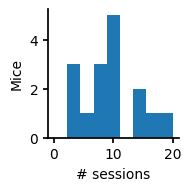

In [12]:
rowSize,colSize= figurePanelDefaultSize()
setFigureDefaultParameters()
fig = plt.figure(figsize=(1*colSize, 1*rowSize), constrained_layout=True) # create a figure
spec = fig.add_gridspec(ncols=1, nrows=1) # create a GridSpec object to a figure
ax = fig.add_subplot(spec[0]) # add an axes to the figure
ax.hist(res.sessions,bins=np.linspace(0,20,10))
ax.set_ylabel("Mice")
ax.set_xlabel("# sessions")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)  

In [ ]:
print("Minimum number of session for a mouse:",res["sessions"].min())
print("Maximum number of session for a mouse:",res["sessions"].max())
print("Median number of session for a mouse:",res["sessions"].median())

Minimum number of session for a mouse: 3
Maximum number of session for a mouse: 25
Median number of session for a mouse: 10.0


In [ ]:
res = df.groupby([df['subject']])
res

We need to know how many trials per sessions.

In [ ]:
res = df.groupby([df['sessionName']])["trialNo"].count()
print("Minimum number of trials per session:", res.min())
print("Maximum number of trials per session:", res.max())
print("Median number of trials per session:", res.median())

Minimum number of trials per session: 38
Maximum number of trials per session: 172
Median number of trials per session: 111.5


We can get the search path length and error at periphery for each mice (median) for light and dark trials. Then we show the results in a boxplot. The statistical unit will be each mouse.

In [16]:
GLOBALFONTSIZE = 9

def calculatePvalue(Pvalue):
    """
    Calculate the symbol to plot based on the given p-value.

    Parameters:
        Pvalue (float): The p-value to calculate the symbol for.

    Returns:
        str: The symbol to plot based on the p-value.
    """

    
    if Pvalue < 0.0001:
        symbolToPlot = '****'
    elif Pvalue < 0.001:
        symbolToPlot = '***'
    elif Pvalue < 0.01:
        symbolToPlot = '**'
    elif Pvalue < 0.05:
        symbolToPlot = '*'
    else:
        symbolToPlot = 'ns'

    return symbolToPlot



    
def draw_stats_bar(ax,A,B,height=0.95,pValue=1):
    """
    Draws a statistics bar on the given axes.

    Parameters:
        ax (Axes): The axes on which to draw the statistics bar.
        A (float): The starting x-coordinate of the bar.
        B (float): The ending x-coordinate of the bar.
        height (float, optional): The height of the bar. Defaults to 0.95.
        pValue (int, optional): The p-value to calculate. Defaults to 1.

    Returns:
        None
    """
    line_x = [A, B]
    line_y = [height,height]

    #Add the horizontal line
    ax.plot(line_x,line_y, color='black', linewidth=1.5,transform=ax.transAxes)

    #Add the two wiskers
    wiskerLeftX = [A, A]
    wiskerLeftY = [height-0.025,height]

    ax.plot(wiskerLeftX,wiskerLeftY, color='black', linewidth=1.5,transform=ax.transAxes)

    wiskerRightX = [B, B]
    wiskerRightY = [height-0.025,height]

    ax.plot(wiskerRightX,wiskerRightY, color='black', linewidth=1.5,transform=ax.transAxes)

    #Add P-Value
    ax.text((A+B)/2, height+0.05, f'{calculatePvalue(pValue)}', fontsize=GLOBALFONTSIZE+1, transform=ax.transAxes,ha='center', va='center')


In [17]:
def plotSearchLength(ax,df):
    dfg = df["searchLength"].groupby([df['subject'],df["light"]])
    dfg = dfg.median().reset_index()
    dfg.light[dfg["light"]=="light"] = "Light"
    dfg.light[dfg["light"]=="dark"] = "Dark"
    
    myColors = darkLightColors()


    # statistics
    u,p =  wilcoxon(dfg.searchLength[dfg["light"]=="Light"],
                        dfg.searchLength[dfg["light"]=="Dark"])

    draw_stats_bar(ax,0.25,0.75,height=0.75,pValue=p)
    print(u,p)
    n = len(dfg.searchLength[dfg["light"]=="Dark"])
    ax.text(0.05, 0.9, f"N = {n}",fontsize=9,transform=ax.transAxes)


    b = sns.stripplot(data=dfg, x="light",y="searchLength",order = ["Dark","Light"],palette=darkLightColors(lighter=False),alpha=0.5,
                  size=5,edgecolor='#373737', linewidth=1, color='black',ax=ax)
    
    ymax=200
    ax.set_ylim(0,ymax)
    ax.set_yticks([0,50,100,150,200])
    ax.set_ylabel("Search path\n length (cm)")
    ax.set_xlabel("")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)  
    
    

    

def plotHomingErrorAtPeripheryAbsolute(ax,df):
    
    df["homingErrorAtPeripheryAbsolute"] = df.homingErrorAtPeriphery.abs()
    
    dfg = df["homingErrorAtPeripheryAbsolute"].groupby([df['subject'],df["light"]])
    dfg = dfg.median().reset_index()
    dfg.light[dfg["light"]=="light"] = "Light"
    dfg.light[dfg["light"]=="dark"] = "Dark"
    
    myColors = darkLightColors()

    # statistics
    u,p =  wilcoxon(dfg["homingErrorAtPeripheryAbsolute"][dfg["light"]=="Light"],
                        dfg["homingErrorAtPeripheryAbsolute"][dfg["light"]=="Dark"])
    print(u,p)
    n = len(dfg["homingErrorAtPeripheryAbsolute"][dfg["light"]=="Dark"])

    
    ax.plot([-0.5,1.5],[np.pi/2,np.pi/2],"--",color="gray")
    ax.text(0.5,np.pi/2+0.1,"Chance level",horizontalalignment='center',fontsize=9)

    draw_stats_bar(ax,0.25,0.75,height=0.65,pValue=p)


    sns.stripplot(data=dfg, x="light",y="homingErrorAtPeripheryAbsolute",order = ["Dark","Light"],hue="light",palette=darkLightColors(lighter=False), alpha=0.5,
                  size=5,edgecolor='#373737', linewidth=1, color='black')
    
    
    ymax=np.pi/2 + .2
    ax.set_ylim(0,ymax)
    ax.set_xlim(-0.5,1.5)
    ax.set_yticks([0,np.pi/4,np.pi/2])
    ax.set_yticklabels(["0",r'$\pi/4$', "$\pi/2$"])
    
    ax.set_ylabel("Error at peri.\n(rad)")
    ax.set_xlabel("")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False) 
    plt.legend([],[], frameon=False) 

    
    

0.0 1.52587890625e-05
0.0 1.52587890625e-05


/tmp/ipykernel_533699/3538225275.py:25: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  b = sns.stripplot(data=dfg, x="light",y="searchLength",order = ["Dark","Light"],palette=darkLightColors(lighter=False),alpha=0.5,
/home/kilo/miniconda3/envs/spikeA/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kilo/miniconda3/envs/spikeA/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kilo/miniconda3/envs/spikeA/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conv

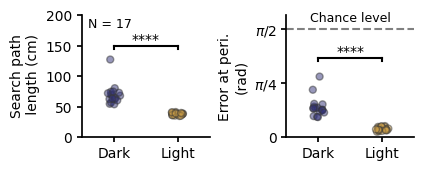

In [18]:
rowSize,colSize= figurePanelDefaultSize()
nPlots=3

fig = plt.figure(figsize=(nPlots*colSize, 1*rowSize), constrained_layout=True) # create a figure
spec = fig.add_gridspec(ncols=nPlots, nrows=2,height_ratios=[0.15,0.9]) # create a GridSpec object to a figure
ax = fig.add_subplot(spec[1,0]) # add an axes to the figure
plotSearchLength(ax,df)

ax = fig.add_subplot(spec[1,1]) # add an axes to the figure
plotHomingErrorAtPeripheryAbsolute(ax,df)

plt.show()

We need evidence that the homing error is correlated with search path length. We can calculate the correlation between search path length and homing error for each mouse. See if we consistently get positive correlation coefficients.

In [19]:
def correlationSearchLengthHomingAccuracy(df, lightCondition = "dark", returnR=True, shuffle=False):
    """
    Get the pearson correlation coefficient between searchLength and homingErrorAtPeripheryAbsolute
    """
    dfD = df[df["light"]==lightCondition]
    dfD = dfD[["searchLength","homingErrorAtPeripheryAbsolute"]]
    # remove excessively long trials (extreme values)
    dfD["searchLength"][dfD["searchLength"]>500] = np.nan
    # remove np.nan
    dfD = dfD.dropna()


    if shuffle:
        shift=10
        r,p = pearsonr(dfD["homingErrorAtPeripheryAbsolute"],np.roll(dfD["searchLength"].to_numpy(),shift=shift))
    
    else:
        r,p = pearsonr(dfD["homingErrorAtPeripheryAbsolute"],dfD["searchLength"])
    if returnR:
        return r
    else:
        return p

def plotCorrelationSearchLengthHomingAccuracyPerMouse(ax,df):
    """
    Plot a distribution of Pearson correlation coefficients 
    """
    resDark = df.groupby(df['subject']).apply(correlationSearchLengthHomingAccuracy,lightCondition="dark",shuffle=False).reset_index()
    resDark.columns = ["subject","r"]
    
    resLight = df.groupby(df['subject']).apply(correlationSearchLengthHomingAccuracy,lightCondition="light",shuffle=False).reset_index()
    resLight.columns = ["subject","r"]
    
    
    sns.histplot(data=resDark, x="r",bins=np.linspace(-0.2,0.6,10),color=darkLightColors()[0],alpha=0.5,label="Dark")
    sns.histplot(data=resLight, x="r",bins=np.linspace(-0.2,0.6,10),color=darkLightColors()[1],alpha=0.5,label="Light")
    
    ax.legend(loc=0,fontsize=8, bbox_to_anchor=(0.06, 0.4, 0.5, 0.5))
    
    
    y,x = np.histogram(resDark.r,bins = np.linspace(-0.2,0.6,10))
    ax.set_xlim(-0.6,0.6)
    ymax=np.max(y)+3
    
    ax.set_ylim(0,ymax)
    ax.set_xlabel("Search-Homing r")
    ax.set_ylabel("Mice")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)  
    
    # statistics
    stat, p = wilcoxon(resDark.r,resLight.r)
    print("Wilcoxon on r values:",stat,p)
    n = len(resDark.r)
    ax.text(-0.27, ymax*0.9, formatPValue(p),fontsize=9)
   
    return

Wilcoxon on r values: 7.0 0.0002899169921875


/home/kilo/miniconda3/envs/spikeA/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kilo/miniconda3/envs/spikeA/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


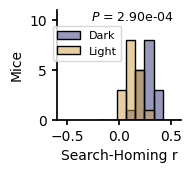

In [20]:
nPlots=1
fig = plt.figure(figsize=(nPlots*colSize, 1*rowSize), constrained_layout=True) # create a figure
spec = fig.add_gridspec(ncols=nPlots, nrows=2,height_ratios=[0.15,0.9]) # create a GridSpec object to a figure
ax = fig.add_subplot(spec[1,0]) # add an axes to the figure
plotCorrelationSearchLengthHomingAccuracyPerMouse(ax,df)
plt.show()

We can get the p-values for these correlations. Their meaning is not clear because the raw data is not normally distributed.

In [21]:
print(df.groupby(df['subject']).apply(correlationSearchLengthHomingAccuracy,returnR=True).reset_index())
print(df.groupby(df['subject']).apply(correlationSearchLengthHomingAccuracy,returnR=False).reset_index())

   subject         0
0   jp1084  0.195079
1   jp1684  0.092393
2   jp1685  0.159930
3   jp1686  0.414588
4   jp1687  0.368386
5   jp3120  0.243540
6   jp3129  0.205447
7   jp3130  0.285232
8   jp3269  0.266693
9    jp451  0.269910
10   jp452  0.280652
11   jp486  0.289663
12   jp487  0.190059
13   jp497  0.320573
14   jp499  0.273927
15  mn8578  0.389315
16  mn8599  0.312325
   subject             0
0   jp1084  3.351285e-05
1   jp1684  1.876380e-01
2   jp1685  2.440644e-02
3   jp1686  1.838356e-18
4   jp1687  4.383225e-08
5   jp3120  2.037414e-08
6   jp3129  7.616567e-06
7   jp3130  3.363290e-04
8   jp3269  1.858936e-09
9    jp451  1.527465e-11
10   jp452  3.431753e-14
11   jp486  6.685438e-31
12   jp487  1.264580e-03
13   jp497  1.020346e-12
14   jp499  2.470949e-10
15  mn8578  4.092758e-23
16  mn8599  4.225228e-25


We could show the homing error for short and long search path. Short and long are established on the search length for each mouse.

In [22]:
def homingErrorFunctionSearchLength(df,lightCondition="dark"):
    
    dfD = df[df["light"]==lightCondition]
    dfD = dfD[["searchLength","homingErrorAtPeripheryAbsolute"]]
    # remove excessively long trials (extreme values)
    dfD["searchLength"][dfD["searchLength"]>500] = np.nan
    # remove np.nan
    dfD = dfD.dropna()

    # get median for different search length
    med, b, bn =  binned_statistic(dfD["searchLength"], dfD["homingErrorAtPeripheryAbsolute"], statistic='median', bins=np.linspace(0,250,6), range=None)

    #plt.plot(b[:-1]+ (b[1]-b[0]),med)
    return pd.Series(med, index= b[:-1]+ (b[1]-b[0]))

def plotHomingErrorFunctionSearchLength(ax,df):
    res = df.groupby(df['subject']).apply(homingErrorFunctionSearchLength,lightCondition="dark").reset_index()
    res = pd.melt(res, id_vars="subject",var_name='search', value_name='homing')
    res.search = res.search.astype(float)
  
    linres = linregress(x = res.search, y = res.homing)
    X = np.linspace(25,275,100)
    Y = X*linres[0]+linres[1]
   
    sns.stripplot(data=res,x="search",y="homing",native_scale=True,  alpha=0.7, color =[darkLightColors(lighter=True)[0]],
                  size=5,edgecolor='#373737', linewidth=1)
    ax.plot(X,Y,color="grey")
    ax.set_xlabel("Search length (cm)")
    ax.set_ylabel("Error at peri.\n(rad)")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False) 
    ax.set_xticks([50,150,250])
    ymax=np.pi/2+0.3
    ax.set_xlim(0,275)
    ax.set_ylim(0,ymax)
        
    # statistics
    q,p = friedmanchisquare(res["homing"][res["search"]==50.0],
                                res["homing"][res["search"]==100.0],
                                res["homing"][res["search"]==150.0],
                                res["homing"][res["search"]==200.0],
                                res["homing"][res["search"]==250.0])
    print("Friedman chi-square:",q,p)
    n = len(res["homing"][res["search"]==50.0])
   
    
    ax.set_yticks([0,np.pi/4,np.pi/2])
    ax.set_yticklabels(["0",r'$\pi/4$', "$\pi/2$"])
    
    ax.text(0.05, 0.9, formatPValue(p),fontsize=9,transform=ax.transAxes)
    

In [27]:
if:

SyntaxError: invalid syntax (879943805.py, line 1)

# Revised figure

Figure width: 7.32
Figure height: 6.8
0.0 1.52587890625e-05
0.0 1.52587890625e-05
Friedman chi-square: 45.60000000000002 2.9830653644842347e-09
Wilcoxon on r values: 7.0 0.0002899169921875


/tmp/ipykernel_533699/3538225275.py:25: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  b = sns.stripplot(data=dfg, x="light",y="searchLength",order = ["Dark","Light"],palette=darkLightColors(lighter=False),alpha=0.5,
/home/kilo/miniconda3/envs/spikeA/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kilo/miniconda3/envs/spikeA/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/kilo/miniconda3/envs/spikeA/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conv

(0.0, 1.0, 0.0, 1.0)

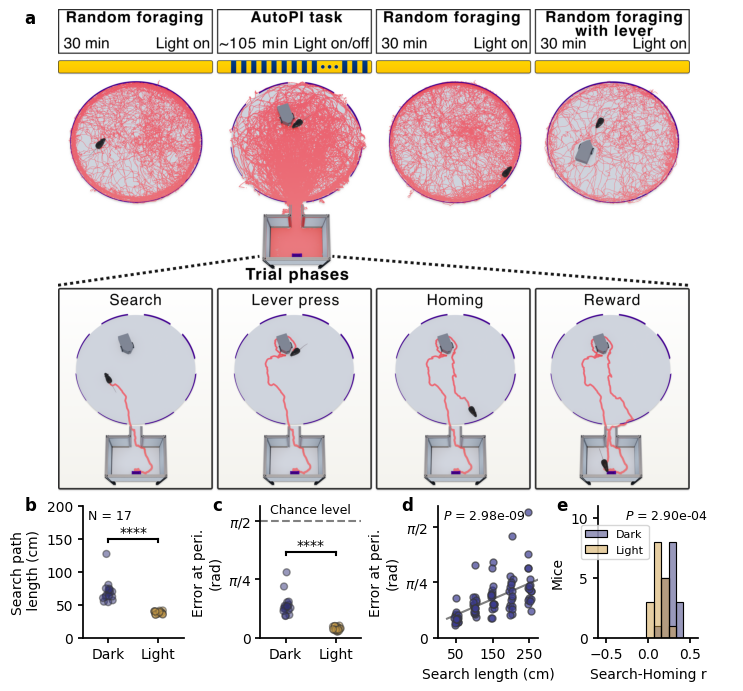

In [29]:
rowSize,colSize= 1.7,1.83 #figurePanelDefaultSize()

ncols=4
nrows=4

print("Figure width: {}".format(ncols*colSize))
print("Figure height: {}".format(nrows*rowSize))


fig = plt.figure(figsize=(ncols*colSize, nrows*rowSize), constrained_layout=True) # create a figure


specLetters = fig.add_gridspec(ncols=1, nrows=1) # create a GridSpec object to a figure



gs = gridspec.GridSpec(nrows, ncols, figure=fig,height_ratios=[0.94,0.93,0.92,1.09],width_ratios=[0.02,1,1,1])
gStats = gridspec.GridSpecFromSubplotSpec(1, 6, subplot_spec=gs[3:, :],width_ratios=[0.01,1,1,1,1,0.25])


img = mpimg.imread(fn)
ax = fig.add_subplot(gs[:3,1:]) # add an axes to the figure
ax.imshow(img)
ax.set_aspect('equal', adjustable='box')
ax.axis('off')




ax = fig.add_subplot(gStats[0,1]) # add an axes to the figure
plotSearchLength(ax,df)

ax = fig.add_subplot(gStats[0,2]) # add an axes to the figure
plotHomingErrorAtPeripheryAbsolute(ax,df)

ax = fig.add_subplot(gStats[0,3]) # add an axes to the figure
plotHomingErrorFunctionSearchLength(ax,df)

ax = fig.add_subplot(gStats[0,4]) # add an axes to the figure
plotCorrelationSearchLengthHomingAccuracyPerMouse(ax,df)





ax = fig.add_subplot(specLetters[0]) # add an axes to the figure

ax.text(0.02,1, 'a', style='normal',fontsize=12, weight="bold")
ax.text(0.02,0.26, 'b', style='normal',fontsize=12, weight="bold")
ax.text(0.28,0.26, 'c', style='normal',fontsize=12, weight="bold")
ax.text(0.54,0.26, 'd', style='normal',fontsize=12, weight="bold")
ax.text(0.755,0.26, 'e', style='normal',fontsize=12, weight="bold")

ax.axis("off")